Implémentation de résolution numérique approchée des 2 équations couplées du mouvement de précession :
$\frac{dv_x}{dt} = \omega v_y(t), 
\frac{dv_y}{dt} = -\omega v_x(t), 
v_x(0) = V_0,
v_y(0) = 0$
à l'aide de la méthode de 

In [1]:
#imports
from numpy import pi, cos, sin, dot, zeros, linspace, matmul, arange
from numpy.linalg import inv, det

Paramètres du modèle

In [2]:
#nombre de coefficients de Fourier ajustables
M = 10
M_range = arange(M) +1

# nombre de points pour la variable indépendante
N = 100
T = linspace(0,1,N)

Paramètres du problème

In [3]:
W = 2*pi #pulsation
V0 = 1 #vitesse initiale

Matrice représentant le système linéaire

In [4]:
#matrice de coefficients (m*W*T[i]) de taille NxM
#avec première coordonnée i, et deuxème m
m_w_T = W*matmul(T.reshape((N,1)), M_range.reshape((1,M)))
cos = cos(m_w_T)
sin = sin(m_w_T)

mat = zeros((2*M,2*M))

for l in range(1,M+1) :
    for m in range(1,M+1) :
        for i in range(N) :
            mat[l-1,m-1] += (1-l)*(1-m)*sin[i,m-1]*sin[i,l-1]
            mat[l-1,m-1] += ((1-l)*cos[i,l-1]-1)*((1-m)*cos[i,m-1]-1)

            mat[l-1,m-1+M] += (1-l)*sin[i,l-1]*((m-1)*cos[i,m-1]+1)
            mat[l-1,m-1+M] += (1-m)*sin[i,m-1]*((1-l)*cos[i,l-1]-1)

            mat[l-1+M,m-1] += ((l-1)*cos[i,l-1]+1)*(1-m)*sin[i,m-1]
            mat[l-1+M,m-1] += (1-l)*sin[i,l-1]*((1-m)*cos[i,m-1]-1)

            mat[l-1+M,m-1+M] += ((l-1)*cos[i,l-1]+1)*((m-1)*cos[i,m-1]+1)
            mat[l-1+M,m-1+M] += (1-l)*(1-m)*sin[i,m-1]*sin[i,l-1]

mat *= W**2





Vecteur $\vec{d}$

In [5]:
d = zeros(2*M)
for l in range(1,M+1) :
    for i in range(N) :
        d[l-1] += (1-l)*cos[i,l-1]-1
        d[l-1+M] += (1-l)*sin[i,l-1]

d*=W**2*V0


Résolution du système

In [6]:
print(det(mat))
mat_inv = inv(mat)
P = matmul(mat_inv,-d)
A = P[:M]
B = P[M:]

1.453896076198183e+94


Résultats obtenus :

In [7]:
print("Coefficients trouvés :",A, B)

Coefficients trouvés : [1.00000000e+00 2.22044605e-16 9.36750677e-17 5.55111512e-17
 3.55618313e-17 2.77555756e-17 1.60461922e-17 3.46944695e-18
 5.63785130e-18 5.20417043e-18] [ 2.44053843e-30 -8.75142567e-31 -3.14311767e-31 -9.24446373e-32
 -1.23259516e-31 -3.38963670e-32 -6.16297582e-33 -4.62223187e-33
 -1.84889275e-32 -9.24446373e-33]


Tracé de l'erreur absolue en échelle log

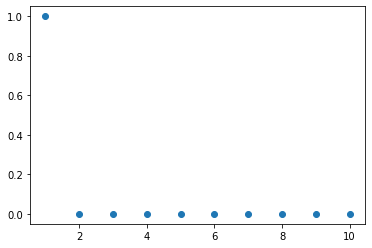

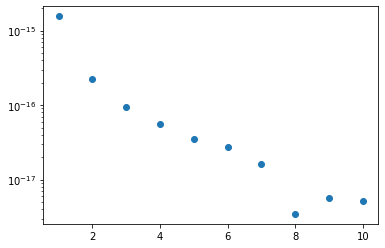

In [8]:
from matplotlib.pyplot import scatter, show, yscale, savefig

#erreur relative sur le premier coefficient
#valeurs théoriques :
A_th = zeros((M))
A_th[0] = 1

erreur = abs(A-A_th)

scatter(range(1, M+1), A)
savefig('coefs_1_inv.jpg')
show()

scatter(range(1, M+1), erreur)
yscale('log')
savefig('coefs_1_inv_erreur.jpg')
show()
